In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()
xtrain = xtrain/255
xtest = xtest/255

In [5]:
xtrainflatten = xtrain.reshape(len(xtrain),28*28)

In [6]:
xtestflatten = xtest.reshape(len(xtest),28*28)

In [7]:
# Define parameters
fold_numbers = [5, 10]  # Update to include both 5 and 10 folds
epoch_numbers = [6, 7, 8, 9, 10]

accuracies_dict = {}  # Dictionary to store accuracies for different combinations

for num_folds in fold_numbers:
    kfold = KFold(n_splits=num_folds)
    for num_epochs in epoch_numbers:
        val_accuracies = []  # Store validation accuracies for this configuration
        
        for fold_num, (train_index, val_index) in enumerate(kfold.split(xtrainflatten)):
            x_train, x_val = xtrainflatten[train_index], xtrainflatten[val_index]
            y_train, y_val = ytrain[train_index], ytrain[val_index]

            model = keras.Sequential([
                keras.layers.Dense(533, input_shape=(784,), activation='sigmoid'),
                keras.layers.Dense(10, activation='sigmoid')
            ])

            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=0.002),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

            history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_val, y_val))
            val_accuracies.append(history.history['val_accuracy'])  # Store validation accuracy for this fold

        # Convert the accuracies to a numpy array and store in the dictionary
        accuracies_dict[f'k_{num_folds}_epochs_{num_epochs}'] = np.array(val_accuracies)


Epoch 1/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3093 - accuracy: 0.9092 - val_loss: 0.1806 - val_accuracy: 0.9454
Epoch 2/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1364 - accuracy: 0.9604 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 3/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0833 - accuracy: 0.9745 - val_loss: 0.1059 - val_accuracy: 0.9660
Epoch 4/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 5/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 6/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0735 - val_accuracy: 0.9772
Epoch 1/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3043 - accuracy: 0.9096 - val_loss: 0.1887 - val_accuracy: 0.9447

In [8]:
accuracies_dict

{'k_5_epochs_6': array([[0.94541669, 0.96483332, 0.96600002, 0.97675002, 0.97483331,
         0.97724998],
        [0.94466668, 0.96016669, 0.96666664, 0.97324997, 0.97258335,
         0.97783333],
        [0.94891667, 0.96058333, 0.96899998, 0.96925002, 0.97541666,
         0.97474998],
        [0.93975002, 0.95950001, 0.96700001, 0.97008336, 0.96691668,
         0.96858335],
        [0.95125002, 0.96541667, 0.97016668, 0.97366667, 0.97425002,
         0.97583336]]),
 'k_5_epochs_7': array([[0.95091665, 0.96841669, 0.97358334, 0.97391665, 0.97483331,
         0.97608334, 0.97283334],
        [0.93841666, 0.96133333, 0.97083336, 0.97558331, 0.97291666,
         0.97066665, 0.97658336],
        [0.94108331, 0.96366668, 0.97149998, 0.97333336, 0.97483331,
         0.97433335, 0.97458333],
        [0.93966669, 0.96041667, 0.96775001, 0.96841669, 0.96824998,
         0.97183335, 0.97299999],
        [0.94999999, 0.9683333 , 0.97100002, 0.97366667, 0.97549999,
         0.97516668, 0.9760833

In [16]:
max_accuracies_dict_k5 = {}

for key, value in accuracies_dict.items():
    if key.startswith('k_5'):
        max_accuracies_dict_k5[key] = np.max(value, axis=1)

# Print or access the max_accuracies_dict_k5 to see the maximum accuracies for k=5
print(max_accuracies_dict_k5)

{'k_5_epochs_6': array([0.97724998, 0.97783333, 0.97541666, 0.97008336, 0.97583336]), 'k_5_epochs_7': array([0.97608334, 0.97658336, 0.97483331, 0.97299999, 0.97608334]), 'k_5_epochs_8': array([0.97916669, 0.97783333, 0.97683334, 0.97624999, 0.97858334]), 'k_5_epochs_9': array([0.97708333, 0.97766668, 0.97733331, 0.97575003, 0.97616667]), 'k_5_epochs_10': array([0.98025   , 0.97783333, 0.97775   , 0.97624999, 0.97933334])}


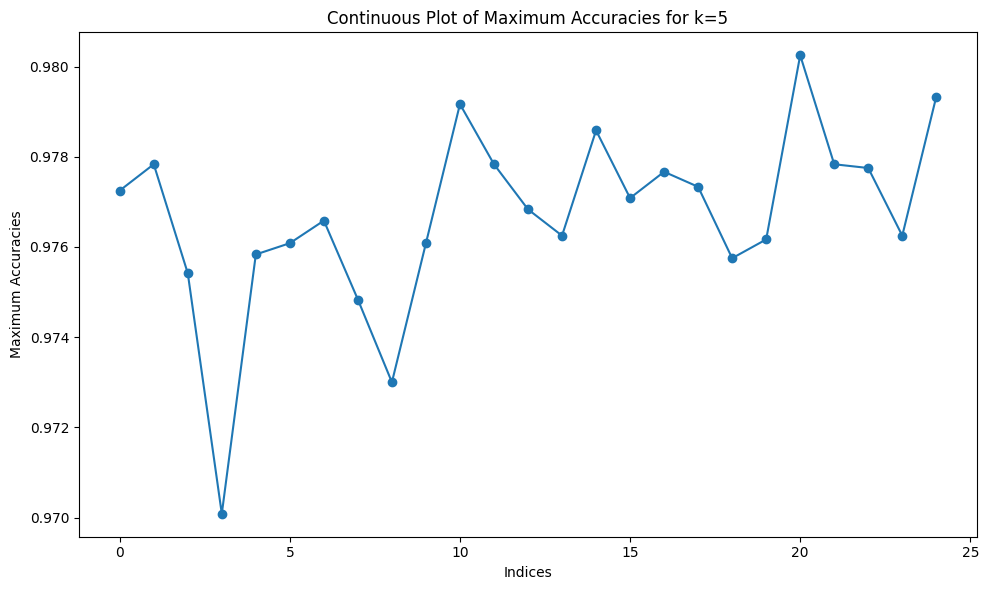

[0.97724998 0.97783333 0.97541666 0.97008336 0.97583336 0.97608334
 0.97658336 0.97483331 0.97299999 0.97608334 0.97916669 0.97783333
 0.97683334 0.97624999 0.97858334 0.97708333 0.97766668 0.97733331
 0.97575003 0.97616667 0.98025    0.97783333 0.97775    0.97624999
 0.97933334]


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten all the values into a single list
all_values = np.concatenate(list(max_accuracies_dict_k5.values()))

# Plotting all values continuously
plt.figure(figsize=(10, 6))
plt.plot(all_values, marker='o', linestyle='-')
plt.xlabel('Indices')
plt.ylabel('Maximum Accuracies')
plt.title('Continuous Plot of Maximum Accuracies for k=5')
plt.tight_layout()
plt.show()
print(all_values)

In [26]:
values_array = np.array(all_values)
mean = np.mean(values_array)
standard_deviation = np.std(values_array)

print("Mean of all accuracies k=5:", mean)
print("Standard Deviation of all accuracies k=5:", standard_deviation)

Mean of all accuracies k=5: 0.9766833353042602
Standard Deviation of all accuracies k=5: 0.002016321150077313


In [28]:
max_accuracies_dict_k10 = {}

for key, value in accuracies_dict.items():
    if key.startswith('k_10'):
        max_accuracies_dict_k10[key] = np.max(value, axis=1)

# Print or access the max_accuracies_dict_k5 to see the maximum accuracies for k=5
print(max_accuracies_dict_k10)

{'k_10_epochs_6': array([0.98216665, 0.9798333 , 0.977     , 0.97666669, 0.9745    ,
       0.97666669, 0.9745    , 0.97366667, 0.97216666, 0.97816664]), 'k_10_epochs_7': array([0.98133332, 0.97750002, 0.977     , 0.97816664, 0.97866666,
       0.97916669, 0.97500002, 0.97500002, 0.97533333, 0.98216665]), 'k_10_epochs_8': array([0.98366666, 0.97966665, 0.97850001, 0.97916669, 0.97916669,
       0.98000002, 0.97583336, 0.97616667, 0.97783333, 0.98116666]), 'k_10_epochs_9': array([0.98033333, 0.98000002, 0.97933334, 0.97833335, 0.97816664,
       0.97966665, 0.97649997, 0.97433335, 0.97533333, 0.98283333]), 'k_10_epochs_10': array([0.98216665, 0.98150003, 0.97966665, 0.98033333, 0.98066664,
       0.97866666, 0.97783333, 0.97799999, 0.97616667, 0.98166668])}


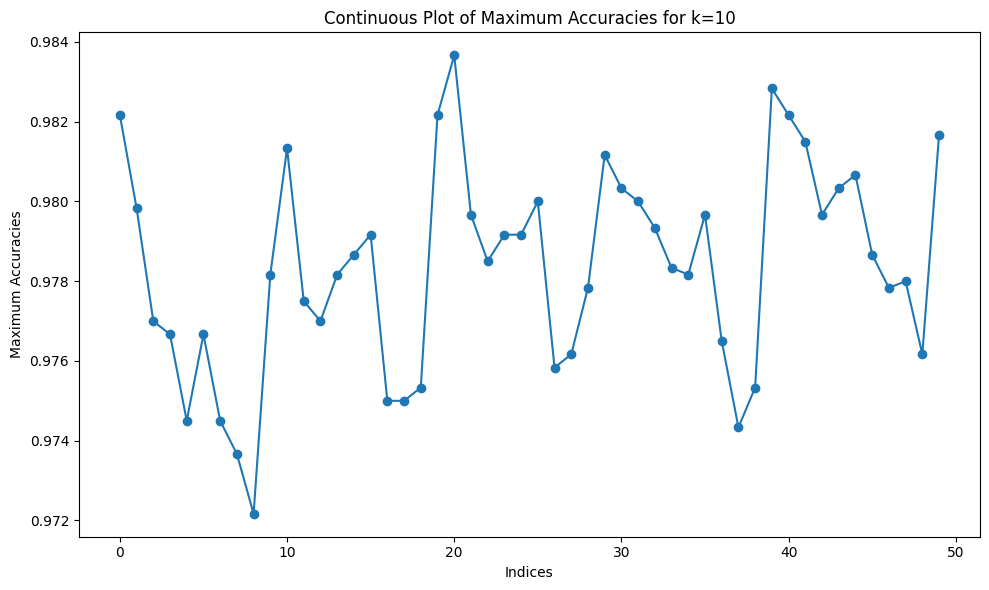

[0.98216665 0.9798333  0.977      0.97666669 0.9745     0.97666669
 0.9745     0.97366667 0.97216666 0.97816664 0.98133332 0.97750002
 0.977      0.97816664 0.97866666 0.97916669 0.97500002 0.97500002
 0.97533333 0.98216665 0.98366666 0.97966665 0.97850001 0.97916669
 0.97916669 0.98000002 0.97583336 0.97616667 0.97783333 0.98116666
 0.98033333 0.98000002 0.97933334 0.97833335 0.97816664 0.97966665
 0.97649997 0.97433335 0.97533333 0.98283333 0.98216665 0.98150003
 0.97966665 0.98033333 0.98066664 0.97866666 0.97783333 0.97799999
 0.97616667 0.98166668]


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten all the values into a single list
all_values1 = np.concatenate(list(max_accuracies_dict_k10.values()))

# Plotting all values continuously
plt.figure(figsize=(10, 6))
plt.plot(all_values, marker='o', linestyle='-')
plt.xlabel('Indices')
plt.ylabel('Maximum Accuracies')
plt.title('Continuous Plot of Maximum Accuracies for k=10')
plt.tight_layout()
plt.show()
print(all_values1)

In [32]:
values_array1 = np.array(all_values1)
mean1 = np.mean(values_array1)
standard_deviation1 = np.std(values_array1)

print("Mean of all accuracies k=10:", mean1)
print("Standard Deviation of all accuracies k=10:", standard_deviation1)

Mean of all accuracies k=10: 0.978346666097641
Standard Deviation of all accuracies k=10: 0.002591400577346473
